In [1]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.9 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.189352
thal        0.244447
dtype: float64
logistic regression model prediction:  [0. 0. 0. 1. 1. 3. 2. 2. 0. 0. 0. 0. 1. 3. 2. 0. 0. 1. 2. 0. 2. 0. 3. 0.
 3. 0. 0. 0. 3. 1. 0. 0. 0. 0. 0. 1. 2. 0. 3. 0. 1. 0. 2. 0. 0. 3. 0. 0.
 1. 0. 0. 0. 0. 0. 2. 0. 0. 3. 3. 2. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


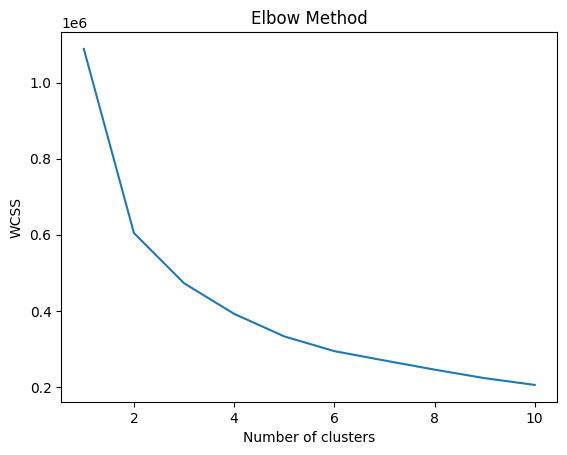

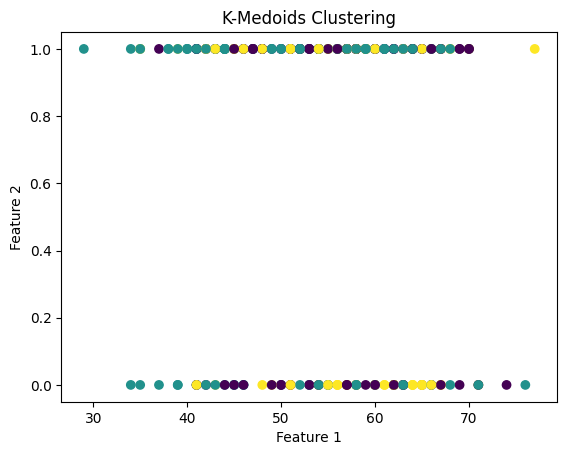

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)
df = df.replace('?', np.nan) # replace '?' with NaN
df = df.astype(float)
# 1. Do not drop data other than the last column
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Check skewness and outliers by plotting and replace missing data according to the skewness
# Check skewness
print(X.skew())

# Replace missing data with mean
X.fillna(X.mean(), inplace=True)

# 3. Do logistic regression and use its result in further processes if that can improve accuracy
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Use the logistic regression model to predict the target variable
y_pred = lr.predict(X_test)
print("logistic regression model prediction: ",y_pred)

# 4. Print the value of K and clusters and apply the Elbow method and plot in the graph
# Apply the Elbow method to determine the optimal number of clusters
wcss = [] #distortion
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow curve, it seems that the optimal number of clusters is 3

# 5. Apply the k-medoids clustering algorithm to show accuracy and plot the graph
# Fit a k-medoids clustering model
kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids.fit(X)

# Plot the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmedoids.labels_)
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
print('\n')
plt.show()

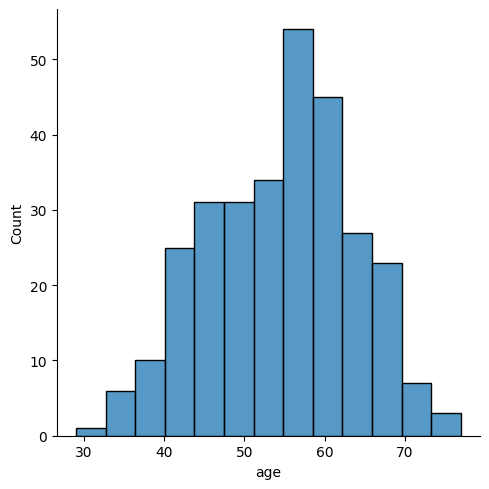

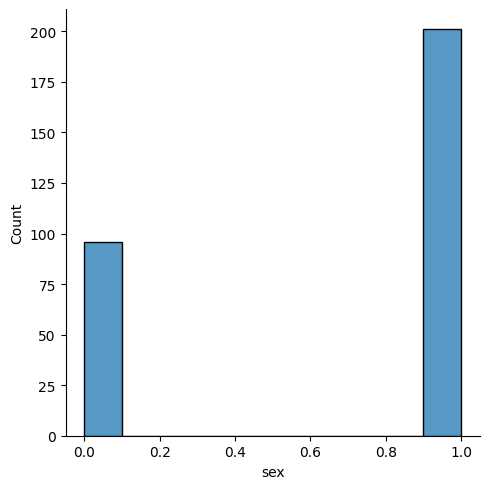

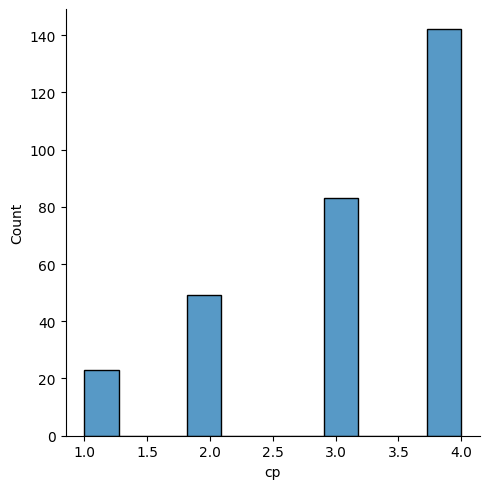

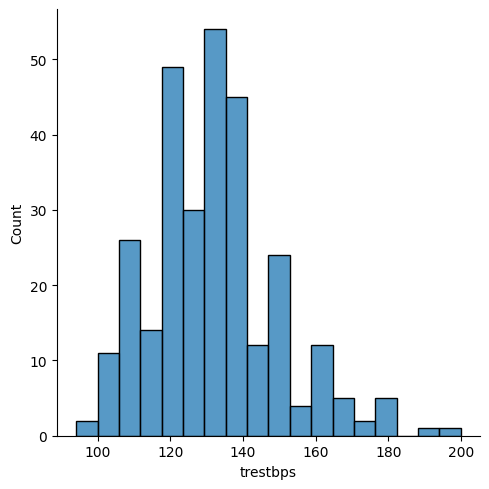

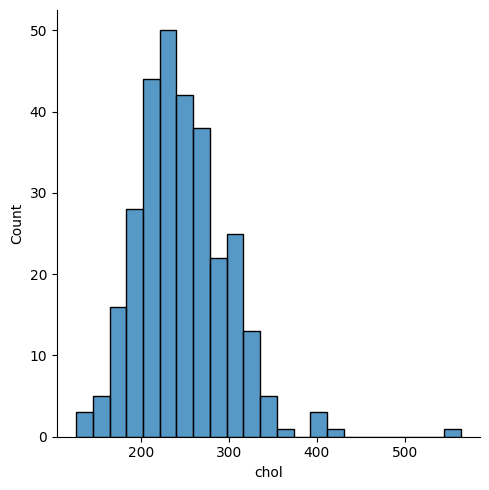

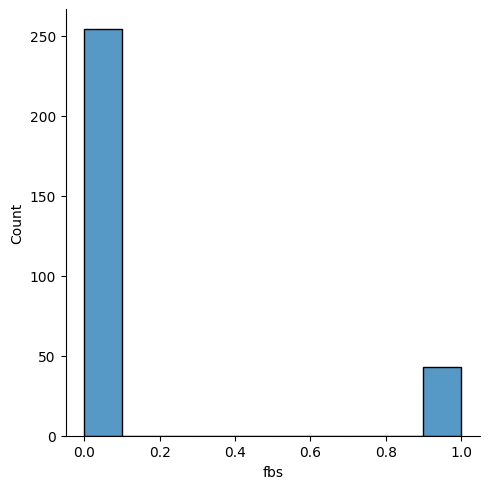

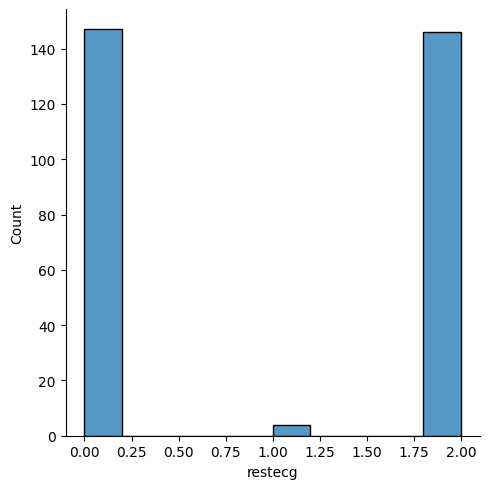

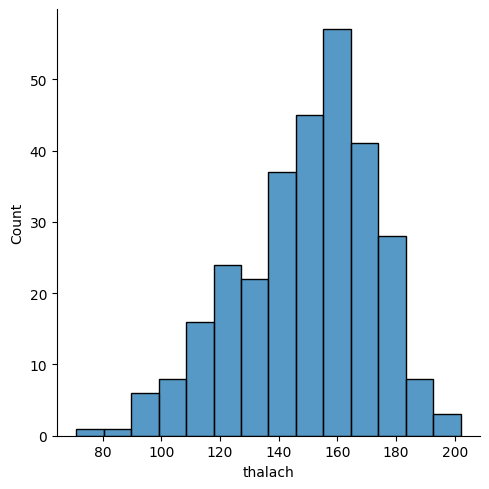

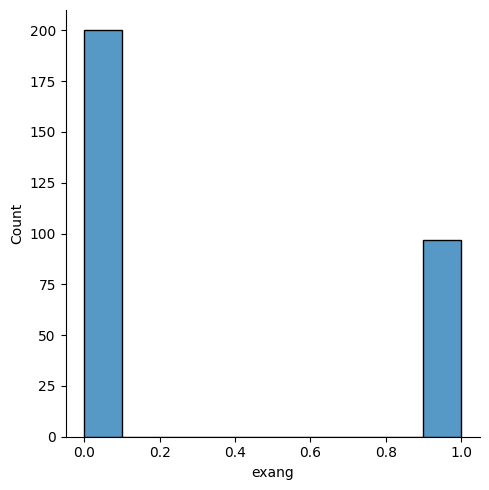

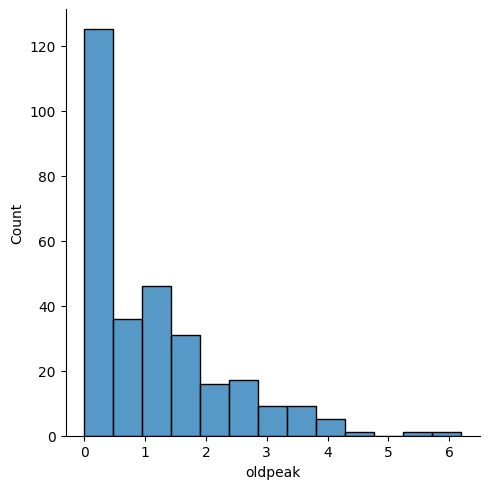

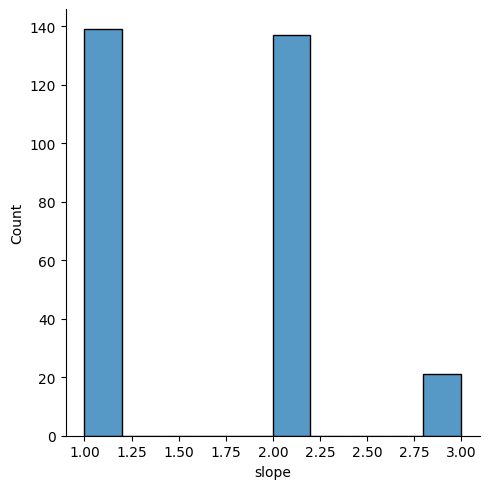

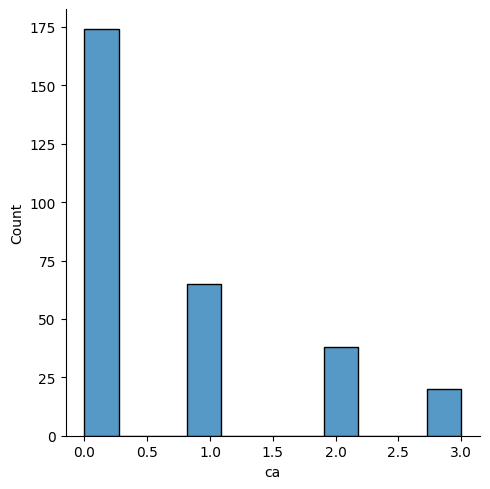

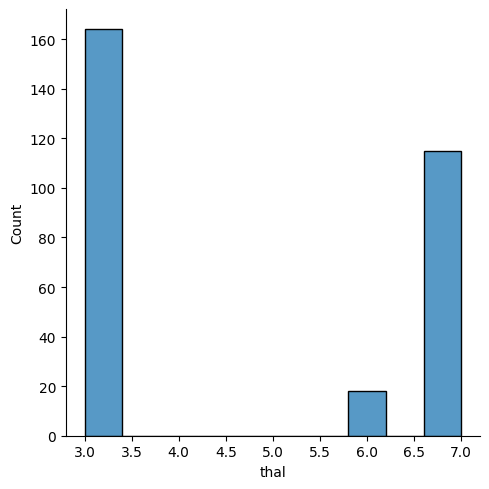

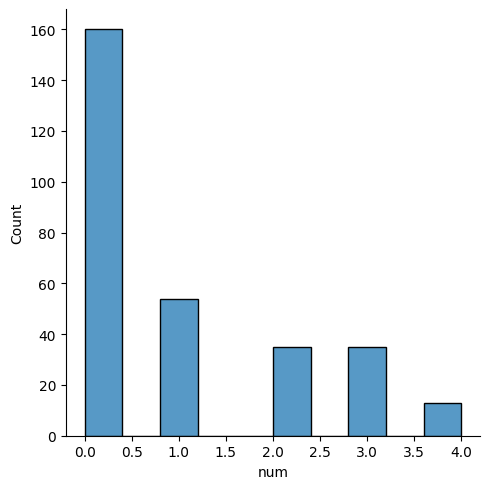

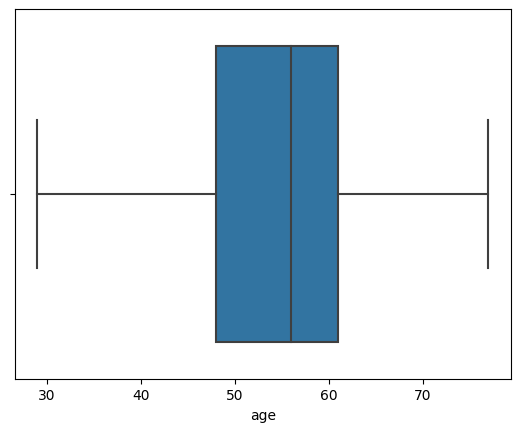

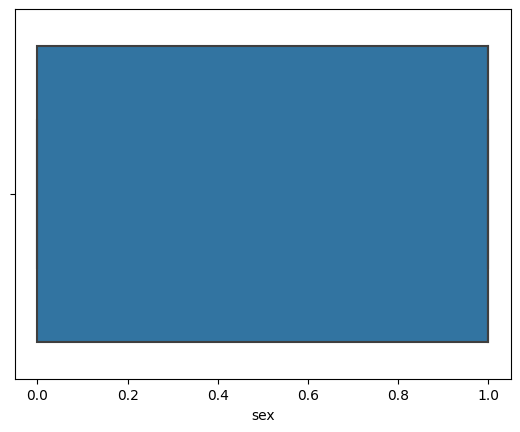

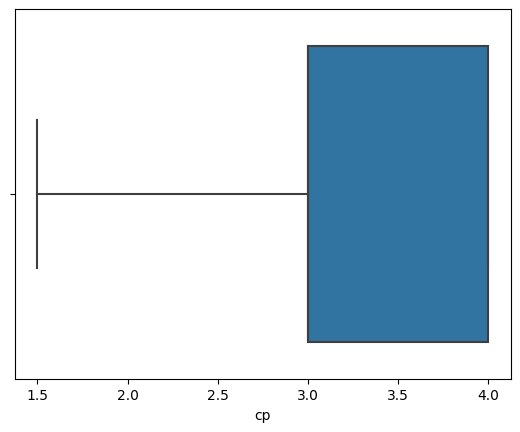

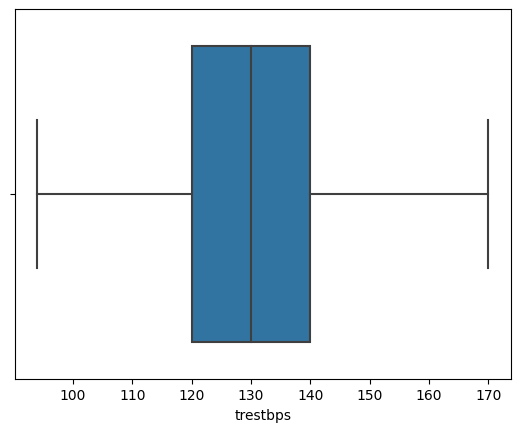

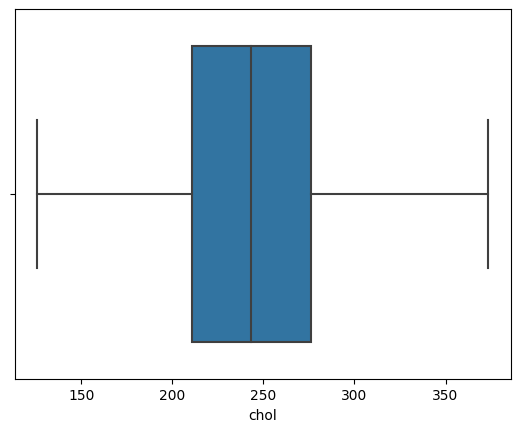

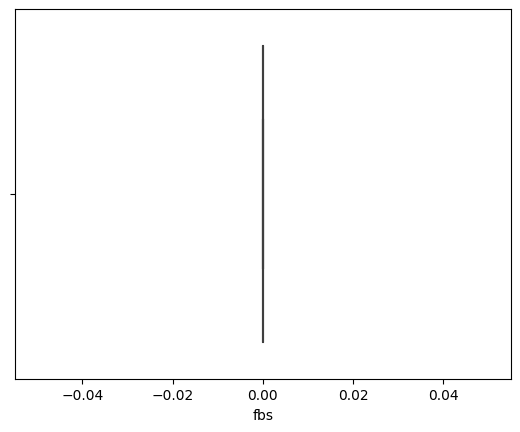

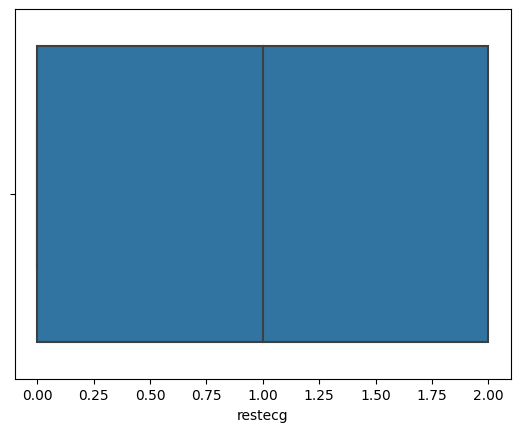

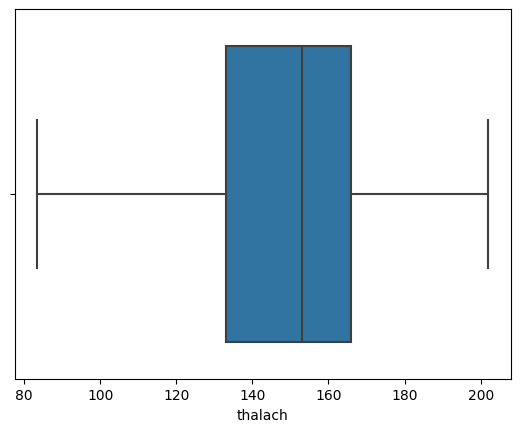

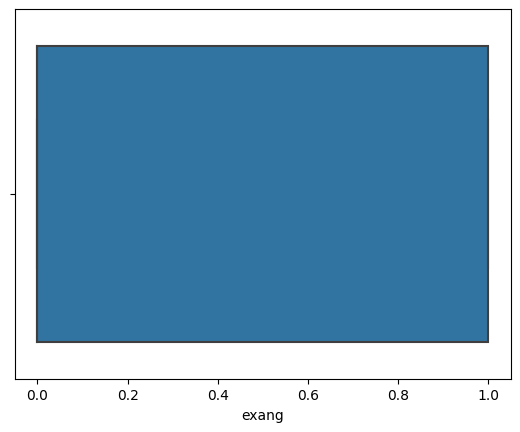

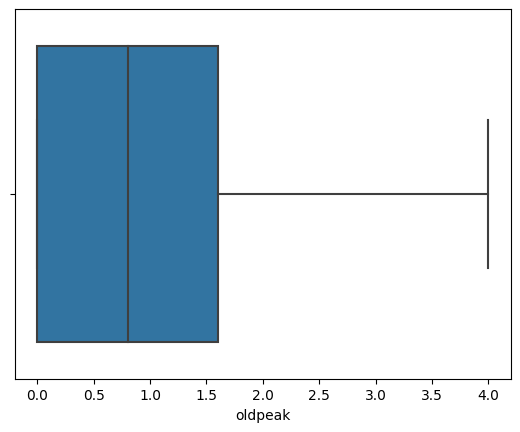

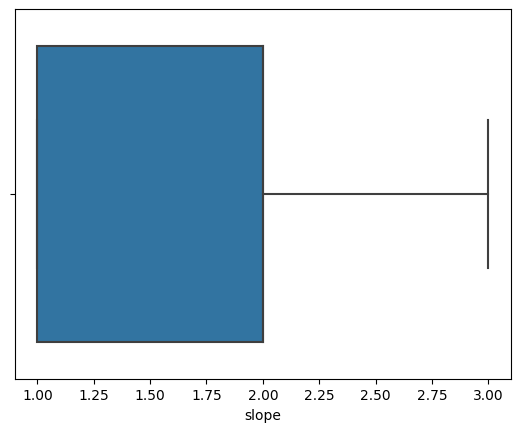

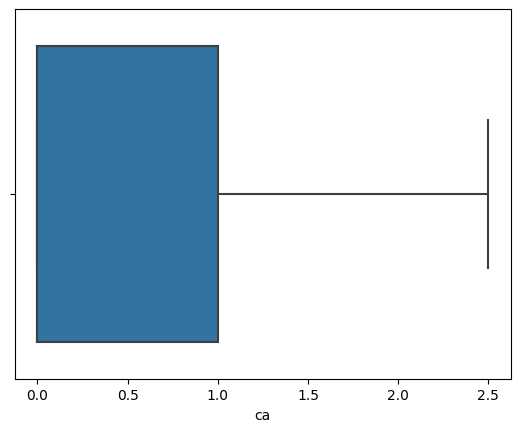

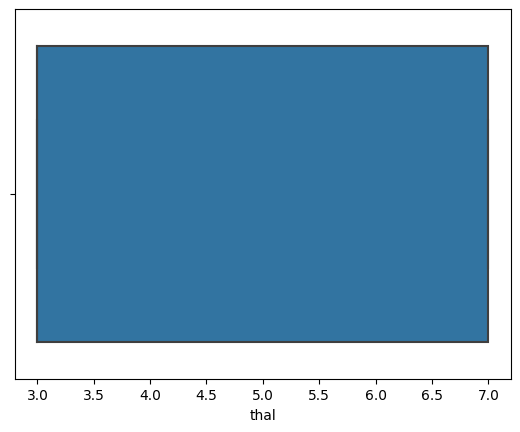

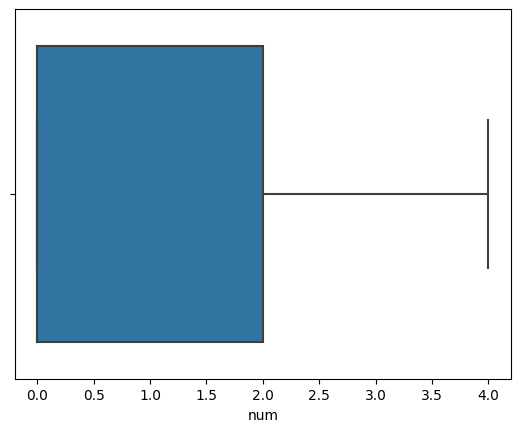

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score of logistic regression: 0.6333333333333333


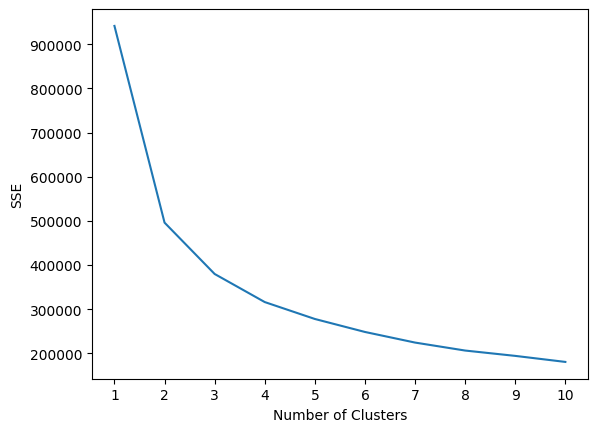

K-means clustering labels: [0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0
 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0
 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0]


NameError: ignored

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv(url, names=names)

# Drop missing data
df = df.replace('?', np.nan)
df = df.dropna()

# Convert data to float
df = df.astype(float)

# Check skewness and outliers
for col in df.columns:
    sns.displot(df[col])
    plt.show()

# Replace outliers
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Boxplot of X for different columns separately
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.show()

# Logistic regression
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy score of logistic regression:", accuracy_score(y_test, y_pred))

# K-means clustering
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(X)
print("K-means clustering labels:", kmeans.labels_)

# K-medoids clustering
y_kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)
print("K-medoids clustering labels:", kMedoids.labels_)

plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kMedoids.cluster_centers_[:, 0], kMedoids.cluster_centers_[:, 1], s=300, c='yellow', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)

# Check for missing values
print(df.isnull().sum())

# Check skewness and outliers
for col in df.columns[:-1]:
    sns.boxplot(x=df[col])
    plt.show()

# Replace missing values with median
df = df.replace('?', np.nan)
df = df.fillna(df.median())

# Change datatype to float
df = df.astype(float)

# Replace outliers with median
for col in df.columns[:-1]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, df[col].median(), df[col])
    df[col] = np.where(df[col] > upper_bound, df[col].median(), df[col])

# Boxplot of X for different columns separately
for col in df.columns[:-1]:
    sns.boxplot(x=df[col])
    plt.show()

# Logistic regression
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression:", accuracy_score(y_test, y_pred))

# K-means clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K-medoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=0)
y_kmedoids = kmedoids.fit_predict(X)
print("K-medoids clustering accuracy:", accuracy_score(y, y_kmedoids))

plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='yellow', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv(url, names=names)

# Replace missing data with NaN
heart_data = heart_data.replace('?', np.nan)

# Convert object columns to numeric
heart_data = heart_data.apply(pd.to_numeric)

# Check skewness and outliers of the columns by plotting
for col in heart_data.columns:
    if col != 'num':
        sns.boxplot(x=heart_data[col])
        plt.show()

# Replace outliers according to the skewness
for col in heart_data.columns:
    if col != 'num':
        q1 = heart_data[col].quantile(0.25)
        q3 = heart_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        heart_data[col] = np.where(heart_data[col] < lower_bound, lower_bound, heart_data[col])
        heart_data[col] = np.where(heart_data[col] > upper_bound, upper_bound, heart_data[col])

#Replace missing values according to the skewness
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Check skewness of the columns by plotting again
for col in heart_data.columns:
    if col != 'num':
        sns.boxplot(x=heart_data[col])
        plt.show()

# Split the data into features and target variable
X = heart_data.iloc[:, :-1]
y = heart_data.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Do logistic regression and use its result in further processes if that can improve accuracy
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression:", accuracy_score(y_test, y_pred))

# Do print the value of K and clusters and apply the Elbow method and plot in the graph
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply the k-medoids clustering algorithm to show accuracy and plot the graph
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids.fit(X)
y_kmedoids = kmedoids.predict(X)
print("Accuracy of k-medoids clustering:", accuracy_score(y, y_kmedoids))

plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='yellow', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)
data = data.replace('?', np.nan) # replace '?' with NaN
data = data.astype(float)

# 1. Do not drop data other than the last column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# 2. Pre-processing
# Check skewness and outliers by plotting
for col in X.columns:
    plt.boxplot(X[col])
    plt.title(col)
    plt.show()


# Replace missing data according to the skewness
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# 3. Logistic regression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Use the logistic regression model to predict on the test set
y_pred = logreg.predict(X_test)

# 4. K-means clustering
# Apply the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# 5. K-medoids clustering
# Apply k-medoids clustering
kmedoids = KMedoids(n_clusters=2, random_state=0)
y_kmedoids = kmedoids.fit_predict(X)


plt.scatter(X[y_kmedoids == 0, 0], X[y_kmedoids == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmedoids == 1, 0], X[y_kmedoids == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=300, c='yellow', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, header=None, na_values='?')
df.head(10)

In [ ]:
#leveling
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, names=names)
df.head(10)

In [ ]:
df.dtypes

In [ ]:
# Show the number of "?" values for each column
print(df.eq('?').sum())

In [ ]:
import seaborn as sns
sns.heatmap(df.eq('?'),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Select the two columns you want to convert data types for


df = df.replace('?', np.nan) # replace '?' with NaN
df = df.astype(float) # convert all columns to float
# Verify the updated data types
print(df.dtypes)

In [ ]:
from scipy.stats import skew




In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'

# Select the two columns you want to calculate the skewness for
columns_to_calculate_skewness = ['ca', 'thal']

# Calculate the skewness using the skew() function
skewness = df[columns_to_calculate_skewness].skew()

# Display the skewness values
print(skewness)

print(skew(df{'ca'}, bias=False));

In [ ]:
# Calculate the median of "ca" and "thal" columns

median_ca = df["ca"].median()
median_thal = df["thal"].median()

print("Median of 'ca' column:", median_ca)
print("Median of 'thal' column:", median_thal)

In [ ]:
# Preprocess the data
imputer = SimpleImputer(strategy='median')
df = imputer.fit_transform(df)
df = pd.DataFrame(df, columns=names)


In [ ]:
df.head()

In [ ]:
df.drop(['target'], axis = 1, inplace = True)
df.head()

In [ ]:
# Compute the distance matrix
X = df.values[:, :]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
D = np.sqrt(((X_scaled[:, None, :] - X_scaled) ** 2).sum(axis=2))

from tabulate import tabulate

print (tabulate(X, headers=names))
print("\n")
print (tabulate(X_scaled, headers=names))
print("\n")
print (tabulate(D, headers=names))

In [ ]:
# Apply the Elbow method
wss = []
for k in range(1, 12):
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=10)
    kmedoids.fit(D)
    wss.append(kmedoids.inertia_)
plt.plot(range(1, 12), wss)
plt.xlabel('Number of clusters')
plt.ylabel('Total within-cluster sum of squares (WSS)')
plt.title('Elbow method')
plt.show()

In [ ]:
# Apply the k-medoids clustering algorithm
k = 2  # optimal number of clusters obtained from the Elbow method
kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=0)
kmedoids.fit(D)
labels = kmedoids.labels_
print(labels)

In [ ]:
# Apply cross-validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=0)
kmedoids_cv = KMedoids(n_clusters=k, metric='euclidean', random_state=0)
kmedoids_cv.fit(X_train)
y_pred = kmedoids_cv.predict(X_test)
score = silhouette_score(X_test, y_pred)
print('Silhouette score:', score)